In [ ]:
%%bash
pip install litellm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [ ]:
%%bash
pip install wikipedia-api

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.3-py3-none-any.whl size=14325 sha256=fb8738a2c9a54cc8a8f0494c2d364aae7eafcfd7800230a82c9db7bb437f3fe5
  Stored in directory: /root/.cache/pip/wheels/39/c8/cd/ba9a385ad2f6e457226fe2a7dceaeb0c17a19346d2e78ff4be
Successfully built wikipedia-api


# Downloading the articles from wikipedia

In [ ]:
import wikipediaapi
import os

# List of country names
countries = [
    "Afghanistan", "Albania", "Algeria", "Antarctica", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria",
    "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia",
    "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia",
    "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Republic of the Congo", "Democratic Republic of the Congo",
    "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czechia", "Denmark", "Djibouti", "Dominica", "Dominican Republic",
    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", 'eSwatini', "Ethiopia", "Fiji",
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq",
    "Ireland", "Israel", "Italy", "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "South Korea", "North Korea",
    "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania",
    "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
    "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar",
    "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Republic of Serbia", "Seychelles", "Sierra Leone", "Singapore",
    "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "Somaliland", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname",
    "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "United Republic of Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States of America",
    "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(
    language="en",
    user_agent="MyCountryArticleFetcher/1.0 (https://nadbordrozd.github.io; nadbordrozd@gmail.com)"
)

# Create directory to store articles
output_dir = "country_articles"
os.makedirs(output_dir, exist_ok=True)

for country in countries:
    try:
        file_path = os.path.join(output_dir, f"{country}.txt")
        if os.path.exists(file_path):
            # print(f"Article for {country} already exists. Skipping...")
            continue
        # Fetch Wikipedia page
        page = wiki_wiki.page(country)

        # Check if page exists
        if not page.exists():
            print(f"Page for {country} does not exist.")
            continue

        # Save page content to a file

        with open(file_path, "w", encoding="utf-8") as f:
            f.write(page.text)
        print(f"Saved article for {country}.")

    except Exception as e:
        print(f"Error saving article for {country}: {e}")

print("Finished downloading country articles.")


Saved article for Afghanistan.
Saved article for Albania.
Saved article for Algeria.
Saved article for Antarctica.
Saved article for Andorra.
Saved article for Angola.
Saved article for Antigua and Barbuda.
Saved article for Argentina.
Saved article for Armenia.
Saved article for Australia.
Saved article for Austria.
Saved article for Azerbaijan.
Saved article for Bahamas.
Saved article for Bahrain.
Saved article for Bangladesh.
Saved article for Barbados.
Saved article for Belarus.
Saved article for Belgium.
Saved article for Belize.
Saved article for Benin.
Saved article for Bhutan.
Saved article for Bolivia.
Saved article for Bosnia and Herzegovina.
Saved article for Botswana.
Saved article for Brazil.
Saved article for Brunei.
Saved article for Bulgaria.
Saved article for Burkina Faso.
Saved article for Burundi.
Saved article for Cabo Verde.
Saved article for Cambodia.
Saved article for Cameroon.
Saved article for Canada.
Saved article for Central African Republic.
Saved article fo

# Defining the functions that analyze the article

In [ ]:
import os
from google.colab import userdata
#  ************************************************************
# I'm doing this in google colab and keeping API keys as secrets.
# You might want to modify this bit
#  ************************************************************

openai_api_key = userdata.get('openai_api_key')
os.environ['OPENAI_API_KEY'] = openai_api_key

deepseek_api_key = userdata.get('deepseek_api_key')
os.environ['DEEPSEEK_API_KEY'] = deepseek_api_key

from typing import Dict, List, Set
import re
import asyncio
import pandas as pd
from pydantic import BaseModel, ValidationError
from openai import AsyncOpenAI

from tqdm.asyncio import tqdm_asyncio

import logging
from litellm import acompletion


logger = logging.getLogger(__name__)


class ParagraphAnalysis(BaseModel):
    is_negative: bool
    topics: List[str]

    class Config:
        frozen = True

class TopicDistribution(BaseModel):
    economy: float = 0.0
    geography: float = 0.0
    history: float = 0.0
    cuisine: float = 0.0
    politics: float = 0.0
    crime: float = 0.0
    lgbt: float = 0.0
    religion: float = 0.0
    health: float = 0.0
    sport: float = 0.0

class ParagraphResult(BaseModel):
    text: str
    analysis: ParagraphAnalysis
    length: int

class ArticleAnalysis(BaseModel):
    negative_sentiment_percentage: float
    topic_distribution: TopicDistribution
    total_paragraphs_analyzed: int
    paragraph_analyses: List[ParagraphResult]

class CountryAnalyses(BaseModel):
    analyses: Dict[str, ArticleAnalysis]
    errors: Dict[str, str]

def split_into_paragraphs(text: str) -> List[str]:
    """Split article text into paragraphs, removing empty lines."""
    paragraphs = [p.strip() for p in text.split('\n\n') if p.strip()]
    return [p for p in paragraphs if len(p.split()) >= 10]  # Filter short paragraphs

def calculate_text_length(text: str) -> int:
    """Calculate the length of text, removing whitespace and special characters."""
    return len(re.sub(r'\s+', '', text))

async def analyze_paragraph(
    paragraph: str,
    semaphore: asyncio.Semaphore,
    model: str = "gpt-4o-mini",
    bad_formatting_retries: bool=5
) -> ParagraphAnalysis:

    prompt = f"""Analyze this paragraph from a Wikipedia article about a country:

{paragraph}

Determine:
1. Does this paragraph about a country cast it in overall negative light? If it's only about the past, not the present, return false.
2. Which topics this paragraph primarily discusses from these options:
   - economy
   - geography
   - history
   - cuisine
   - politics
   - lgbt
   - religion
   - crime
   - health
   - sport

EXAMPLE 1:
For a negative paragraph about economy and politics:
{{
    "is_negative": true,
    "topics": ["economy", "politics"]
}}

EXAMPLE 2:
For a neutral paragraph about geography:
{{
    "is_negative": false,
    "topics": ["geography"]
}}

Remember:
- Always use double quotes for JSON strings
- Only use the predefined topic categories
- Return ONLY the JSON object, no other text or explanation
   """
    for _ in range(bad_formatting_retries):
        async with semaphore:
            try:
                if 'deepseek' in model:
                    # annoyingly, response_format breaks deepseek but is necessary for gpt-4
                    response = await acompletion(
                        model=model,
                        messages=[{"role": "user", "content": prompt}],
                        timeout=30,
                        max_retries=5,
                        temperature=0.2
                    )
                else:
                    response = await acompletion(
                        model=model,
                        messages=[{"role": "user", "content": prompt}],
                        response_format=ParagraphAnalysis,
                        timeout=30,
                        max_retries=5,
                        temperature=0.2
                    )
                return ParagraphAnalysis.model_validate_json(response.choices[0].message.content)
            except ValidationError as e:
                continue
            except Exception as e:
                logger.error(f"Error analyzing paragraph: {str(e)}")
                raise

async def analyze_article(
    article_text: str,
    semaphore: asyncio.Semaphore,
    model: str = "gpt-4o-mini",
    country: str = ""
) -> ArticleAnalysis:
    """
    Analyzes a Wikipedia article about a country by breaking it into paragraphs
    and analyzing each paragraph concurrently.
    """
    paragraphs = split_into_paragraphs(article_text)

    # Analyze all paragraphs concurrently
    tasks = [
        analyze_paragraph(paragraph, semaphore, model)
        for paragraph in paragraphs
    ]

    # Wait for all paragraph analyses to complete
    paragraph_analyses_results = await tqdm_asyncio.gather(
        *tasks,
        desc=f"Analyzing paragraphs for {country}"
    )

    # Process results
    total_length = 0
    negative_length = 0
    topic_lengths = {
        "economy": 0, "geography": 0, "history": 0, "cuisine": 0,
        "politics": 0, "crime": 0, "lgbt": 0, "religion": 0,
        "health": 0, "sport": 0
    }

    paragraph_analyses: List[ParagraphResult] = []

    for paragraph, analysis in zip(paragraphs, paragraph_analyses_results):
        if analysis is None:
            continue
        paragraph_length = calculate_text_length(paragraph)
        total_length += paragraph_length

        if analysis.is_negative:
            negative_length += paragraph_length

        if analysis.topics:
            for topic in analysis.topics:
                if topic in topic_lengths:
                    topic_lengths[topic] += paragraph_length

        paragraph_analyses.append(ParagraphResult(
            text=paragraph,
            analysis=analysis,
            length=paragraph_length
        ))

    # Calculate final percentages
    topic_distribution = TopicDistribution(
        **{topic: (length / total_length * 100) if total_length > 0 else 0
           for topic, length in topic_lengths.items()}
    )

    return ArticleAnalysis(
        negative_sentiment_percentage=(negative_length / total_length * 100) if total_length > 0 else 0,
        topic_distribution=topic_distribution,
        total_paragraphs_analyzed=len(paragraph_analyses),
        paragraph_analyses=paragraph_analyses
    )

async def process_articles(
    articles: Dict[str, str],
    model: str = "gpt-4o-mini",
    max_concurrent_paragraphs: int = 10
) -> pd.DataFrame:
    """
    Process articles sequentially, with async paragraph processing.

    Returns a DataFrame with columns:
        - country (str): Country name
        - negative (float): Percentage of negative content
        - economy (float): Percentage about economy
        - geography (float): Percentage about geography
        - history (float): Percentage about history
        - cuisine (float): Percentage about cuisine
        - politics (float): Percentage about politics
        - crime (float): Percentage about crime
        - lgbt (float): Percentage about LGBT topics
        - other (float): Percentage about other topics
    """
    semaphore = asyncio.Semaphore(max_concurrent_paragraphs)
    rows = []

    for country, text in articles.items():
        try:
            article_analysis = await analyze_article(text, semaphore, model, country)
            d = article_analysis.topic_distribution.model_dump()
            d['negative'] = article_analysis.negative_sentiment_percentage
            d['country'] = country
            rows.append(d)
        except Exception as e:
            print(f"Error processing {country}: {e}")

    df = pd.DataFrame(rows)
    return df

# This part is just testing different models

In [ ]:
country = 'Argentina'
with open(f'country_articles/{country}.txt', 'r', encoding='utf-8') as file:
    article_text = file.read()


In [ ]:
# testing which paragraphs deepseek thinks are negative
semaphore = asyncio.Semaphore(30)
result = await analyze_article(article_text, semaphore, 'deepseek/deepseek-chat', country)
print()
for p in result.paragraph_analyses:
    if p.analysis.is_negative:
        print(p.text)
        print()

Analyzing paragraphs for Argentina: 100%|██████████| 51/51 [00:03<00:00, 12.77it/s]


Boosting the neo-Keynesian economic policies laid by Duhalde, Kirchner ended the economic crisis attaining significant fiscal and trade surpluses, and rapid GDP growth. Under his administration, Argentina restructured its defaulted debt with an unprecedented discount of about 70% on most bonds, paid off debts with the International Monetary Fund, purged the military of officers with dubious human rights records, nullified and voided the Full Stop and Due Obedience laws, ruled them as unconstitutional, and resumed legal prosecution of the Junta's crimes. He did not run for reelection, promoting instead the candidacy of his wife, senator Cristina Kirchner who won the 2007 and 2011 elections. During Kirchner's presidecy promoted foreign relations with countries such as Venezuela, Iran, and Cuba, whilst US and UK relations increasingly strained. Despite increased renewable energy production and subsidies during her tenure, the overall economy had been sluggish since 2011.
On 22 November 2

In [ ]:
# testing gpt-4
semaphore = asyncio.Semaphore(5)
result = await analyze_article(article_text, semaphore, 'gpt-4o', country)
print()
for p in result.paragraph_analyses:
    if p.analysis.is_negative:
        print(p.text)
        print()

Analyzing paragraphs for Argentina: 100%|██████████| 51/51 [00:07<00:00,  6.58it/s]


Fernández and vice president Cristina Kirchner took office in December 2019, just months before the COVID-19 pandemic hit Argentina and among accusations of corruption, bribery and misuse of public funds during Néstor and Cristina Kirchner's presidencies. In November 2021, the centre-left coalition of Argentina's ruling Peronist party,  Frente de Todos (Front for Everyone), lost its majority in Congress, for the first time in almost 40 years, in midterm legislative elections. The election victory of the centre-right coalition, Juntos por el Cambio (Together for Change) limited Fernández' power during his final two years in office. Losing control of the Senate made it difficult for him to make key appointments, including to the judiciary. It also forced him to negotiate with the opposition on every initiative send to the legislature.
In April 2023, Fernández announced that he would not seek re-election in the next presidential election. The November 2023 election run-off ended in a win

In [ ]:
semaphore = asyncio.Semaphore(3)
result = await analyze_article(article_text, semaphore, 'gpt-4o-mini', country)
for p in result.paragraph_analyses:
    if p.analysis.is_negative:
        print(p.text)
        print()

Analyzing paragraphs for Argentina: 100%|██████████| 51/51 [00:09<00:00,  5.35it/s]

Argentina, officially the Argentine Republic, is a country in the southern half of South America. Argentina covers an area of 2,780,400 km2 (1,073,500 sq mi), making it the second-largest country in South America after Brazil, the fourth-largest country in the Americas, and the eighth-largest country in the world. It shares the bulk of the Southern Cone with Chile to the west, and is also bordered by Bolivia and Paraguay to the north, Brazil to the northeast, Uruguay and the South Atlantic Ocean to the east, and the Drake Passage to the south. Argentina is a federal state subdivided into twenty-three provinces, and one autonomous city, which is the federal capital and largest city of the nation, Buenos Aires. The provinces and the capital have their own constitutions, but exist under a federal system. Argentina claims sovereignty over the Falkland Islands, South Georgia and the South Sandwich Islands, the Southern Patagonian Ice Field, and a part of Antarctica.
The earliest recorded hu

# Running the analysis

In [ ]:
c2a = {}
for c in countries:
    with open(f'country_articles/{c}.txt', 'r', encoding='utf-8') as f:
        article_text = f.read()
        c2a[c] = article_text


from time import time
start = time()
df = await process_articles(c2a, 'deepseek/deepseek-chat', 40)
# running all this with gpt-4o costs around $10; with deepseek its almost nothing
# df = await process_articles(c2a, 'gpt-4o', 3)     # for gpt have to use low parallelism to stay within rate limits

print(f'Took {time() - start:.1f} seconds')

Analyzing paragraphs for Canada: 100%|██████████| 43/43 [00:03<00:00, 13.75it/s]
Analyzing paragraphs for Central African Republic: 100%|██████████| 39/39 [00:02<00:00, 14.78it/s]
Analyzing paragraphs for China:   0%|          | 0/65 [00:00<?, ?it/s]ERROR:__main__:Error analyzing paragraph: litellm.BadRequestError: DeepseekException - Error code: 400 - {'error': {'message': 'Content Exists Risk', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.

Error processing China: litellm.BadRequestError: DeepseekException - Error code: 400 - {'error': {'message': 'Content Exists Risk', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}



Analyzing paragraphs for Colombia:   0%|          | 0/51 [00:00<?, ?it/s]ERROR:__main__:Error analyzing paragraph: litellm.BadRequestError: DeepseekException - Error code: 400 - {'error': {'message': 'Content Exists Risk', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.




Analyzing paragraphs for Colombia: 100%|██████████| 51/51 [00:10<00:00,  5.00it/s]

Analyzing paragraphs for Comoros: 100%|██████████| 32/32 [00:02<00:00, 13.43it/s]

Analyzing paragraphs for Republic of the Congo: 100%|██████████| 21/21 [00:02<00:00,  8.04it/s]

Analyzing paragraphs for Democratic Republic of the Congo:   0%|          | 0/51 [00:00<?, ?it/s]
Analyzing paragraphs for Democratic Republic of the Congo:   2%|▏         | 1/51 [00:01<01:32,  1.85s/it]
Analyzing paragraphs for Democratic Republic of the Congo:  20%|█▉        | 10/51 [00:01<00:05,  6.91it/s]
Analyzing paragraphs for Democratic Republic of the Congo:  31%|███▏      | 16/51 [00:02<00:03, 11.53it/s]
Analyzing paragraphs for Democratic Republic of the Congo:  45%|████▌     | 23/51 [00:02<00:01, 17.83it/s]
Analyzing paragraphs for Democratic Republic of the Congo:  59%|█████▉    | 30/51 [00:02<00:00, 24.89it/s]
Analyzing paragraphs for Democratic Republic of the Congo:  76%|███████▋  | 39/51 [00:02<00:00, 34.78it


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.

Error processing Taiwan: litellm.BadRequestError: DeepseekException - Error code: 400 - {'error': {'message': 'Content Exists Risk', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}



Analyzing paragraphs for Tajikistan:   0%|          | 0/40 [00:00<?, ?it/s]ERROR:__main__:Error analyzing paragraph: litellm.BadRequestError: DeepseekException - Error code: 400 - {'error': {'message': 'Content Exists Risk', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_request_error'}}



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.




Analyzing paragraphs for Tajikistan: 100%|██████████| 40/40 [00:04<00:00,  8.28it/s]

Analyzing paragraphs for United Republic of Tanzania:   0%|          | 0/58 [00:00<?, ?it/s]
Analyzing paragraphs for United Republic of Tanzania:   2%|▏         | 1/58 [00:01<01:39,  1.75s/it]
Analyzing paragraphs for United Republic of Tanzania:  17%|█▋        | 10/58 [00:01<00:06,  7.32it/s]
Analyzing paragraphs for United Republic of Tanzania:  31%|███       | 18/58 [00:01<00:02, 14.33it/s]
Analyzing paragraphs for United Republic of Tanzania:  64%|██████▍   | 37/58 [00:02<00:00, 34.83it/s]
Analyzing paragraphs for United Republic of Tanzania:  83%|████████▎ | 48/58 [00:03<00:00, 16.11it/s]
Analyzing paragraphs for United Republic of Tanzania: 100%|██████████| 58/58 [00:03<00:00, 15.30it/s]

Analyzing paragraphs for Thailand: 100%|██████████| 56/56 [00:03<00:00, 14.02it/s]

Analyzing paragraphs for Timor-Leste: 100%|██████████| 27/27 [00:02<00:00, 11.09it/s]

Analyzing paragraphs for Togo: 100%|█

Took 739.3 seconds


In [ ]:
# deepseek refuses to answer questions about China and UAE. Falling back on gpt-4o
fallback_countries = ['China', 'Taiwan', 'Estonia', 'United Arab Emirates']
df1 = await process_articles({c: c2a[c] for c in fallback_countries}, 'gpt-4o', 3)
df_full = pd.concat([df[~df.country.isin(fallback_countries)], df1])

Analyzing paragraphs for United Arab Emirates: 100%|██████████| 52/52 [00:12<00:00,  4.11it/s]


# Plotting findings on a map of the world

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import requests
import tempfile
import os
from functools import lru_cache

@lru_cache(maxsize=1)
def get_world_map_data():
    """
    Download and cache the world map data.
    Returns GeoDataFrame with world map data.
    """
    temp_dir = tempfile.mkdtemp()
    geojson_path = os.path.join(temp_dir, "world_map.geojson")
    url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"

    response = requests.get(url)
    response.raise_for_status()

    # Save the GeoJSON data
    with open(geojson_path, 'w', encoding='utf-8') as f:
        f.write(response.text)

    world = gpd.read_file(geojson_path)
    return world

def plot_world_map(
    df: pd.DataFrame,
    column: str,
    title: str = None,
    save_path: str = None,
    figsize: tuple = (20, 10),
    cmap: str = 'Reds',
    legend_label: str = None
) -> None:
    """
    Create a world map visualization of any numerical column from the DataFrame.

    Args:
        df: DataFrame with 'country' column and the column to visualize
        column: Name of the column to visualize
        title: Title for the plot (defaults to column name if not provided)
        save_path: Optional path to save the figure
        figsize: Size of the figure as (width, height)
        cmap: Color map for the visualization (defaults to 'Reds')
        legend_label: Label for the legend (defaults to column name if not provided)
    """
    # Validate input
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")
    if 'country' not in df.columns:
        raise ValueError("DataFrame must have a 'country' column")

    # Get cached world map data
    world = get_world_map_data()

    # Clean and standardize country names
    df = df.copy()
    name_column = 'ADMIN'
    # Merge data with world map
    world = world.merge(
        df[['country', column]],
        how='left',
        left_on=name_column,
        right_on='country'
    )

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the map
    world.plot(
        column=column,
        ax=ax,
        legend=True,
        legend_kwds={
            'label': legend_label or column,
            'orientation': 'horizontal',
            'shrink': 0.6,
            'pad': 0.01
        },
        missing_kwds={'color': '#f5f5f5'},
        cmap=cmap
    )

    # Customize the appearance
    ax.axis('off')
    plt.title(title or f'World Map of {column}', pad=20, size=16)

    # Add text for countries without data
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor='#f5f5f5',
                                   label='No data available')]
    ax.legend(handles=legend_elements, loc='lower left', frameon=False)

    # Print countries that couldn't be matched
    unmatched = set(df['country']) - set(world[name_column])
    if unmatched:
        print("Warning: Could not match these countries:", sorted(unmatched))

    # Save if path provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)

    plt.show()

    # Print statistics about the visualized column
    matched_data = world[world[column].notna()][column]
    if not matched_data.empty:
        print(f"\nStatistics for {column}:")
        print(f"Number of countries with data: {len(matched_data)}")
        print(f"Average: {matched_data.mean():.1f}")
        print(f"Maximum: {matched_data.max():.1f}")
        print(f"  Country: {world.loc[world[column].idxmax(), name_column]}")
        print(f"Minimum: {matched_data.min():.1f}")
        print(f"  Country: {world.loc[world[column].idxmin(), name_column]}")


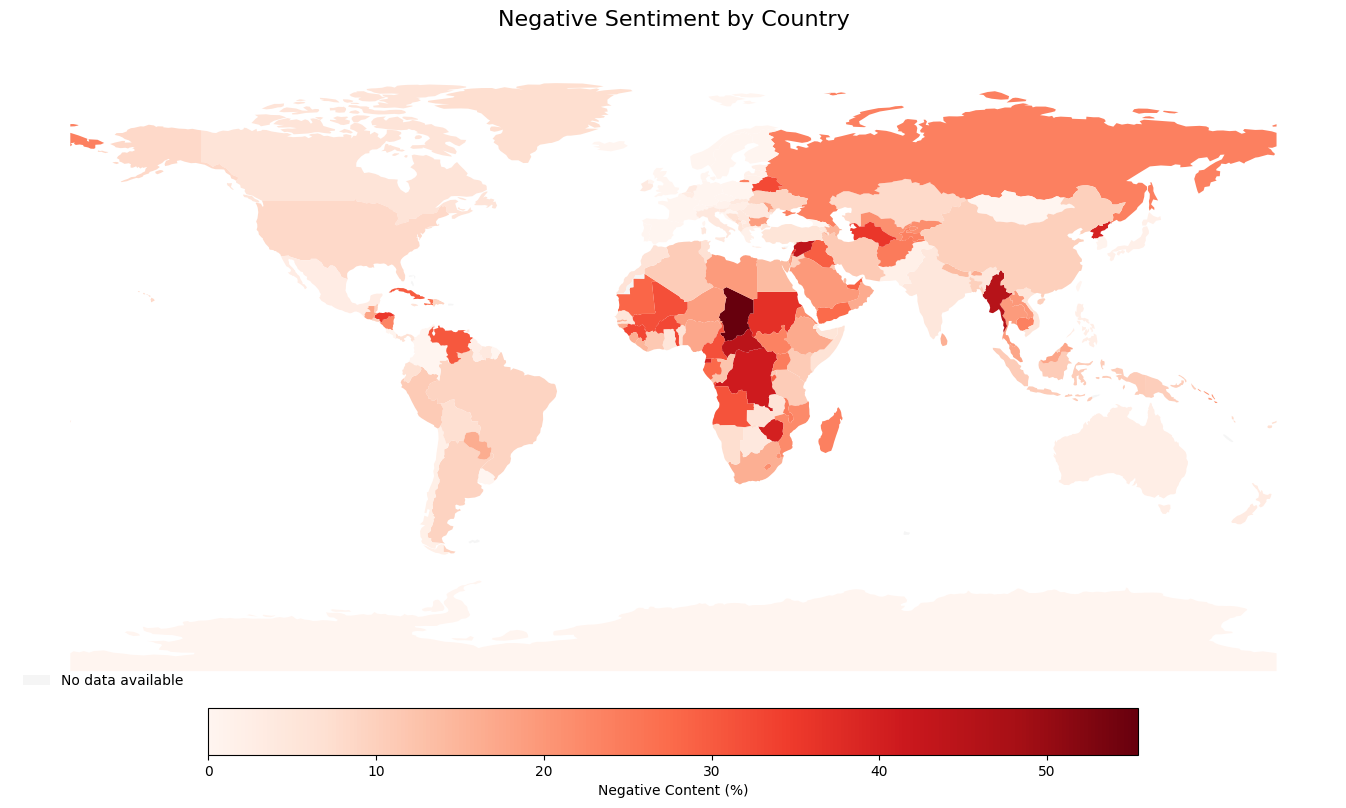


Statistics for negative:
Number of countries with data: 169
Average: 13.4
Maximum: 55.5
  Country: Chad
Minimum: 0.0
  Country: Norway


In [ ]:
plot_world_map(df_full, 'negative', title='Negative Sentiment by Country', legend_label='Negative Content (%)')

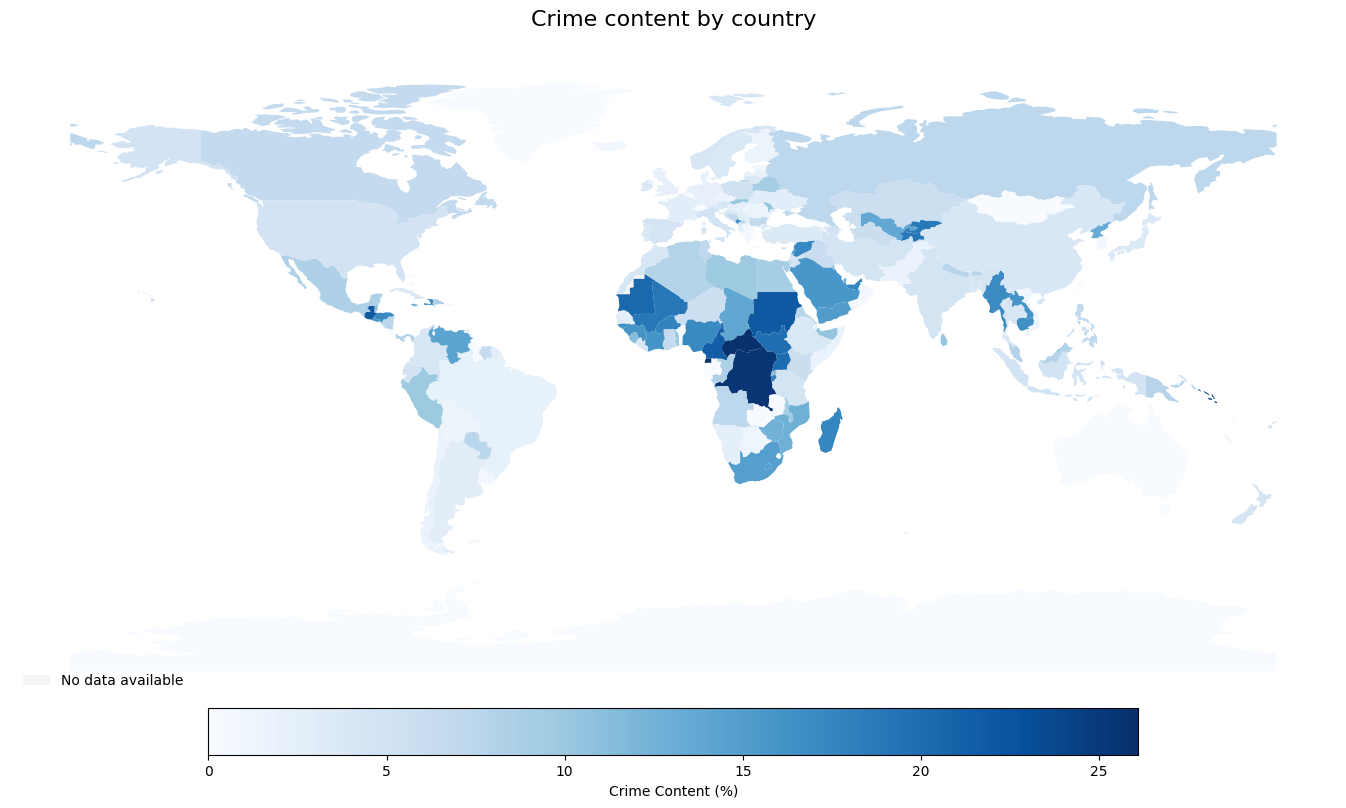


Statistics for crime:
Number of countries with data: 169
Average: 7.7
Maximum: 26.1
  Country: Equatorial Guinea
Minimum: 0.0
  Country: Greenland


In [ ]:
plot_world_map(df_full, 'crime', title='Crime content by country', legend_label='Crime Content (%)', cmap='Blues')

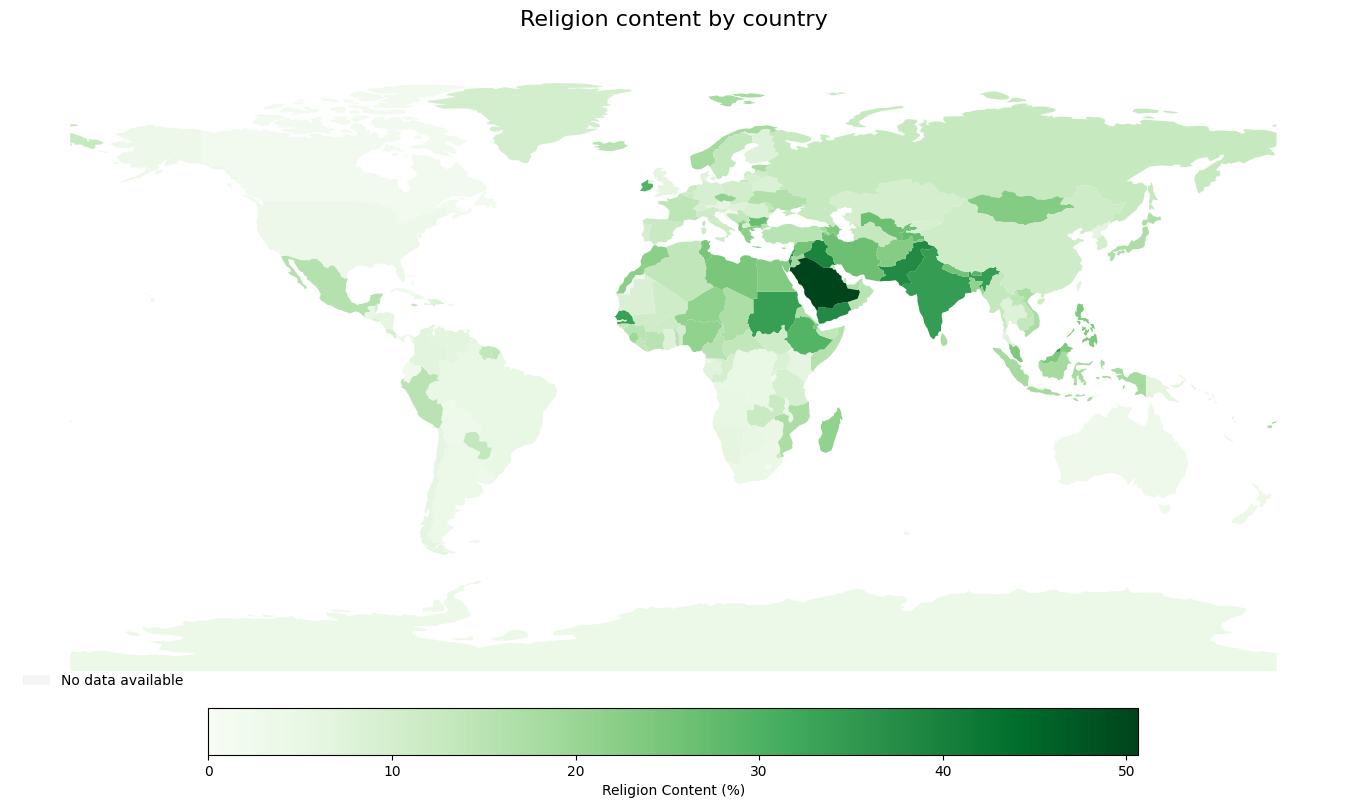


Statistics for religion:
Number of countries with data: 169
Average: 14.1
Maximum: 50.7
  Country: Saudi Arabia
Minimum: 0.0
  Country: Georgia


In [ ]:
plot_world_map(df_full, 'religion', title='Religion content by country', legend_label='Religion Content (%)', cmap='Greens')

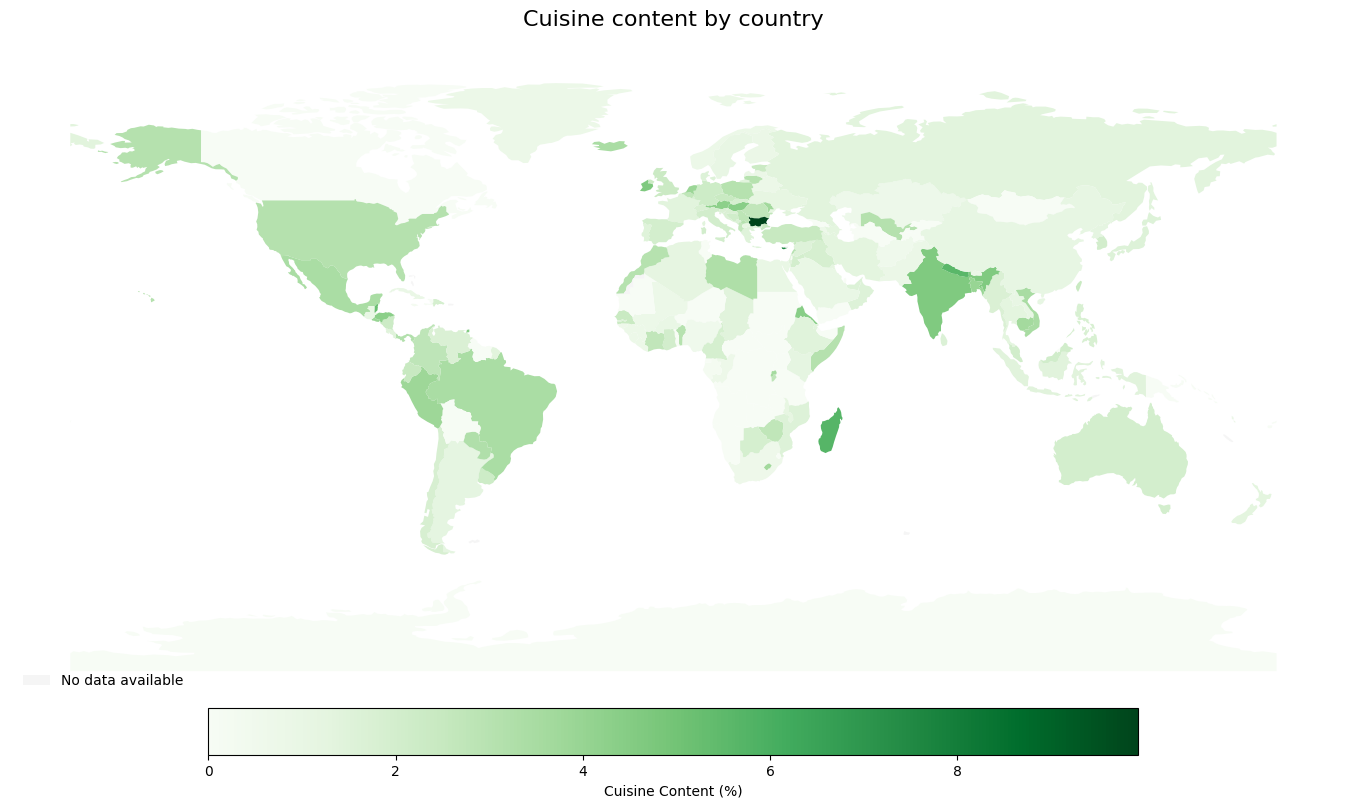


Statistics for cuisine:
Number of countries with data: 169
Average: 1.8
Maximum: 9.9
  Country: Bulgaria
Minimum: 0.0
  Country: Fiji


In [ ]:
plot_world_map(df_full, 'cuisine', title='Cuisine content by country', legend_label='Cuisine Content (%)', cmap='Greens')

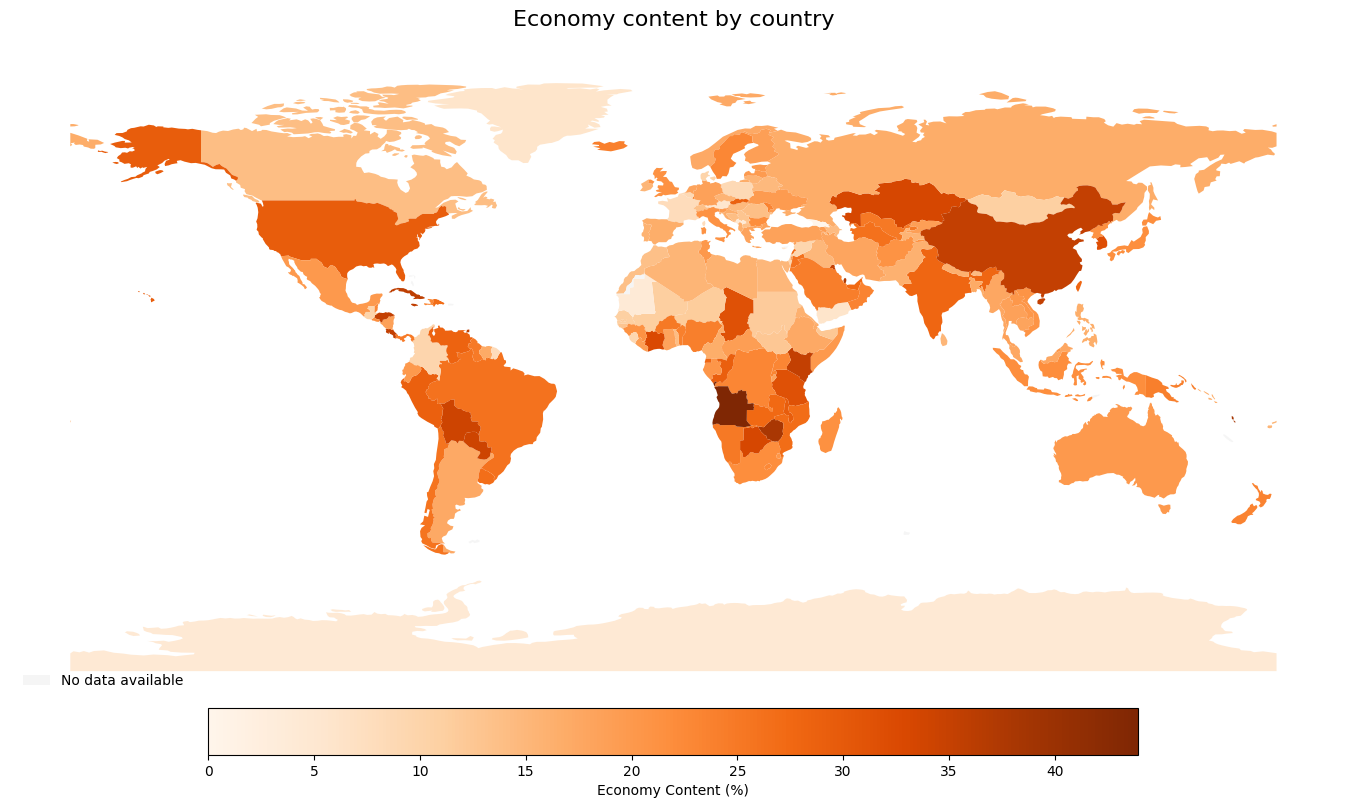


Statistics for economy:
Number of countries with data: 169
Average: 20.2
Maximum: 44.0
  Country: Angola
Minimum: 0.0
  Country: Georgia


In [ ]:
plot_world_map(df_full, 'economy', title='Economy content by country', legend_label='Economy Content (%)', cmap='Oranges')

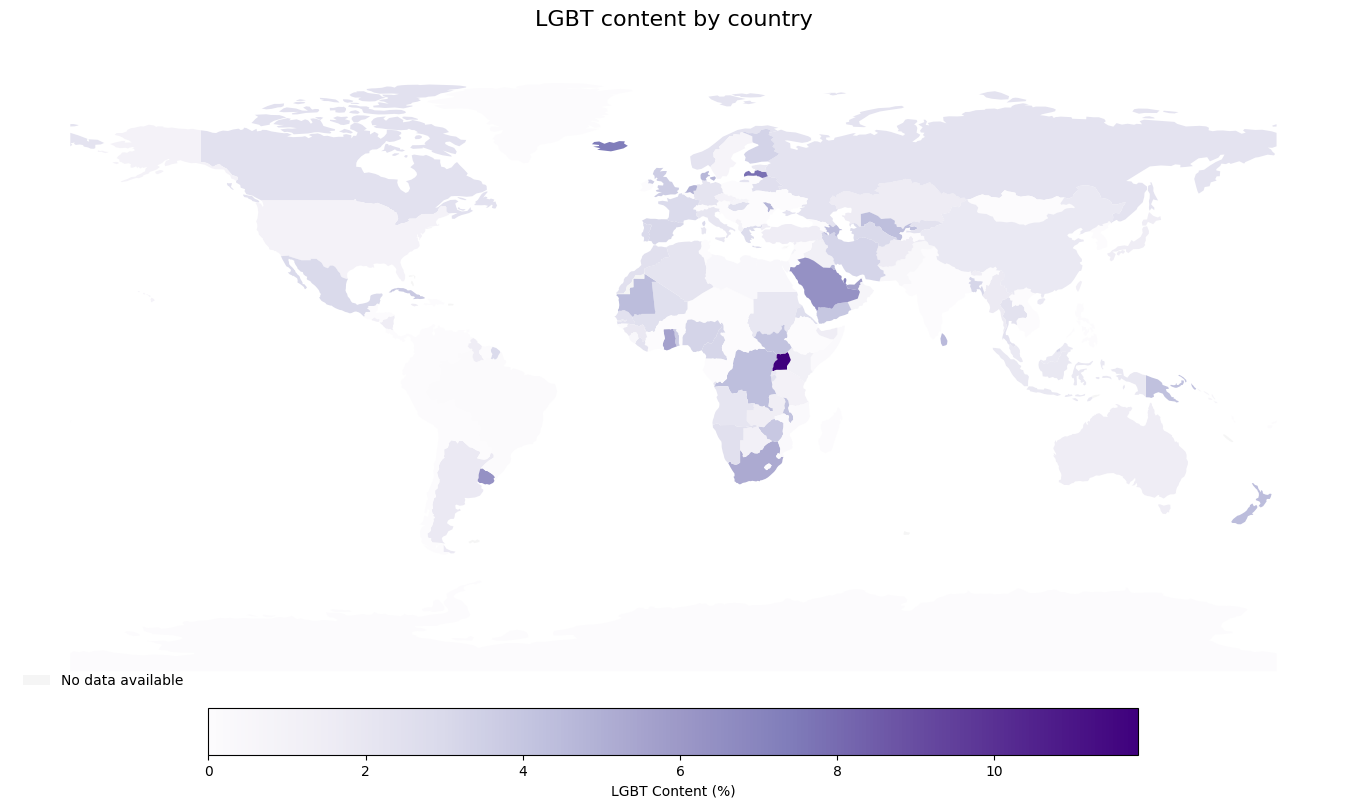


Statistics for lgbt:
Number of countries with data: 169
Average: 1.6
Maximum: 11.8
  Country: Uganda
Minimum: 0.0
  Country: Fiji


In [ ]:
plot_world_map(df_full, 'lgbt', title='LGBT content by country', legend_label='LGBT Content (%)', cmap='Purples')